# ПРОЕКТ "ПРЕДОБРАБОТКА ДАННЫХ"






## Исследование надёжности заёмщиков

В данном проекте мы проанализируем данные, предоставленные заемщиками в кредитный отдел банка, а так же их кредитная история.

<a id = "division_1"> На первом этапе</a> нам необходимо будет провести предобработку данных:
- избавиться от пропусков и дубликатов
- дать рекомендации как в дальнейшем избежать подобных проблем с содержанием базы данных.

<a id = "division_3">Следующим этапом</a> мы категоризируем данные, что поможет нам точнее определить факторы, влияющие на факт погашения кредита в срок.

Влияние разных факторов будет подробно рассмотрено и наглядно проиллюстрировано в <a id = "division_3"> последнем разделе</a> проекта. Результатом этого этапа станут:
- сводные таблицы
- наглядные гистограммы 
зависимости платежеспособности клиента от его уровня дохода, типа занятости, семейного положения.

Полученные выводы будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### 1. Просмотр данных. Общая информация по таблице.

Для начала импортируем Pandas, прочтем файл и просмотрим общую информацию о данных в таблице:

In [2]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Становятся очевидны следующие проблемы с данными:
- визуально заметны очевидные проблемы с заполнением столбца `days_employed`, в котором много отрицательных значений
- в двух столбцах `days_employed` и `total_income` значительный процент пропусков
- в таблице явно много дубликатов будет встречаться в столбцах `education` и `purpose`

Первым делом исправим очевидные артефакты - отрицательные значения в столбце рабочего стажа клиентов:

In [3]:
df['days_employed'] = df['days_employed'].abs()
df['children'] = df['children'].abs()
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

Предоставленные заказчиком данные потребуют следующей предобработки:
1. удаление очевидных пропусков 
2. исправление дубликатов
3. изменения типа данных некоторых столбцов для большей точности дальнейших расчетов





### 2. Предобработка данных

### 2.1 Обработка пропусков

На предыдущем этапе мы уже выяснили, что в двух столбцах `education`и `total_income`  у нас есть около двух тысяч пропусков.

Чтобы понять, можно ли просто удалить некорректно заполненные данные без ущерба для качества исследования, узнаем, какой % пропусков допущен в этих столбцах:

In [4]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
len(df[df['total_income'].isna()==True]['total_income']) /len(df)

0.10099883855981417

Число пропусков достаточно велико и  составляет 10% от общего числа данных.
Что не позволяет нам удалить строки с пропусками, т.к. это может в дальнейшем исказить результаты расчетов. 

Пропуски в столбцах `days_employed` не учитываются в дальнейших расчетах, поэтому им будет присвоенозначение "0",чтобы в дальнейшем его легко можно было отфильтровать.


In [6]:
df['days_employed'] = df['days_employed'].fillna(0)

In [7]:
df[df['days_employed']== 0].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,0.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,0.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,0.0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,0.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,0.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Пропуски в столбце `total_income` заменим медианным значением дохода для каждого типа занятости.

Сначала построим вспомогательную таблицу с медианным значением ежемесячного дохода для каждого типа занятости клиентов.

In [8]:
m_table = df.groupby(['income_type']).agg({'total_income' : 'median'})
m_table


,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


Теперь автоматически подставим всем категориям занятости на месте пропуска в доходах медианную зарплату по их категории:

In [9]:

for income_type in m_table.index:
   
    s=m_table.loc[income_type, 'total_income']
    df.loc[df['income_type'] == income_type, 'total_income'] = df.loc[df['income_type'] == income_type, 'total_income'].fillna(s)    

    
df[['income_type','total_income']].head(10)



,income_type,total_income
0,сотрудник,253875.639453
1,сотрудник,112080.014102
2,сотрудник,145885.952297
3,сотрудник,267628.550329
4,пенсионер,158616.077870
5,компаньон,255763.565419
6,компаньон,240525.971920
7,сотрудник,135823.934197
8,сотрудник,95856.832424
9,сотрудник,144425.938277


In [10]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Пропуски ликвидированы и заменены логичными значениями

#### Вывод

На данном этапе мы избавились оценили процент пропусков в таблице и пришли к выводу, что удаление 10% данных может оказать существенное влияние на точность дальнейшего исследования. Поэтому нами было принято решение заполнить пропуски логичными значениями: нулевым для столбца `days_employed` и медианным значением для каждой категории занятости в столбце `total_income`.

Можно предположить, что пропуски носят случайный характер, т.е. ошибка заполнения таблицы происходит или на стадии заполнения клиентом анкеты, или на этапе переноса данных анкеты в базу данных.

### 2.2 Замена типа данных

Для точности дальнейших расчетов будет правильнее заменить тип данных в числовых столбцах на целочисленное значение:

In [11]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')



In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


#### Вывод

Во избежании ошибок в расчетах, всем числовым столбцам присвоен целочисленный тип

### 2.3 Обработка дубликатов

Начнем обработку очевидных дубликатов в столбце `education`, которые появились в нем из-за внесения данных в разном регистре.

Получим сначала список уникальных значений этого столбца:

In [13]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

В столбце `education` много смысловых дублей, приведем все значения столбца в нижний регистр:

In [14]:
df['education'] = df['education'].str.lower()

df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Дубликаты в столбце `education` ликвидированы.

Проверим другие текстовые столбцы на возможные дубликаты.
Столбец `family_status`:

In [15]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

В графе `family_status` дубликатов не обнаружено, все значения являются уникальными.

Теперь проверим на дубликаты и артефакты столбец `gender`:

In [16]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

В столбце `gender` обнаружен артефакт: в одной строке не указан пол заемщика. Этот пропуск не трудно устранить, запросив дополнительные данные (ФИО заемщика). 
В нашем анализе пол заемщика не будет рассматриваться, как фактор влияния на платежеспособность клиента, поэтому оставим пока графу без изменений.
Если бы пол имел значение, можно было логически заменить пропуск на женский пол, т.к. из полученных данных очевидно, что женщины в два раза чаще выступают в качестве заемщика.


Следующим шагом посмотрим уникальные значения столбца `income_type`:

In [17]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

По типу дохода у нас дублей не обнаружено.

Так как цель кредита указывается клиентом в анкете в произвольной форме, то очень многие значения по смыслу дублируют друг друга. Мы категоризируем столбец `purpose` с помощью метода лемматизации.

Для начала составим список уникальных целей:

In [18]:
category_list = df['purpose'].unique()
category_list


array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Все цели кредитов можно объединить в следующие категории:
* свадьба
* операции с недвижимостью
* автомобиль
* образование

Объединим значения столбца `purpose` в эти общие категории на следующем шаге обработки данных.

#### Вывод

Основным источником дубликатов являлись столбцы `education` за счет некорректного внесения данных в разных регистрах, а так же в графе `purpose`, что связано со свободной формой указания цели кредита заемщиком на этапе анкетирования.

Мы устранили проблемы с регистром методом `str.lower()` и привели данные об образовании, выяснив, что больше половины заемщиков имеют образование не выше среднего.

По данным о целях кредита составлен список уникальных значений, с помощью которого мы далее категоризируем столбец `purpose` и избавимся от многочисленных дубликатов.



### 2.4 Лемматизация

Для начала напишем функцию, которая будет принимать на входе каждое из уникальных значений столбца `purpose`, проводить его лемматизацию и возвращать общее название категории, учитывая наличие определенных лемм:

In [19]:
from pymystem3 import Mystem
m = Mystem()
 
def purpose_category(row):
   
    lemmas = m.lemmatize(row)
    
    if ('недвижимость' in lemmas) or ('жилье' in lemmas):
        return 'недвижимость'
 
    elif 'образование' in lemmas:
        return 'образование'
 
    elif 'автомобиль' in lemmas:
        return 'автомобиль'
 
    elif 'свадьба' in lemmas:
        return 'свадьба'
 



Теперь составим словарь уникальных значений и присвоенных им категорий:

In [20]:
category_dict = {c:purpose_category(c) for c in category_list}
category_dict

{'покупка жилья': 'недвижимость',
 'приобретение автомобиля': 'автомобиль',
 'дополнительное образование': 'образование',
 'сыграть свадьбу': 'свадьба',
 'операции с жильем': 'недвижимость',
 'образование': 'образование',
 'на проведение свадьбы': 'свадьба',
 'покупка жилья для семьи': 'недвижимость',
 'покупка недвижимости': 'недвижимость',
 'покупка коммерческой недвижимости': 'недвижимость',
 'покупка жилой недвижимости': 'недвижимость',
 'строительство собственной недвижимости': 'недвижимость',
 'недвижимость': 'недвижимость',
 'строительство недвижимости': 'недвижимость',
 'на покупку подержанного автомобиля': 'автомобиль',
 'на покупку своего автомобиля': 'автомобиль',
 'операции с коммерческой недвижимостью': 'недвижимость',
 'строительство жилой недвижимости': 'недвижимость',
 'жилье': 'недвижимость',
 'операции со своей недвижимостью': 'недвижимость',
 'автомобили': 'автомобиль',
 'заняться образованием': 'образование',
 'сделка с подержанным автомобилем': 'автомобиль',
 'полу

Применим словарь к столбцу `purpose` нашей главной таблицы данных и создадим в ней новый столбец с присвоением общих категорий цели кредита:

In [21]:
df['purpose_category'] = df['purpose'].map(category_dict)
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


#### Вывод

С помощью метода лемматизации мы устранили дубли из целей кредита.
Можно предположить, что причина этой проблемы - неудачно составленный опросник, где будущий заемщик может указать цель кредита в свободной форме.

В качестве решения данной проблемы можем предложить доработку анкеты, добавив в раздел целей кредитования уже готовые варианты наиболее часто встречающихся значений (свадьба, недвижимость, автомобиль, образование)

### 2.5 Категоризация данных

Теперь пришло время обработать данные в столбце `total_income`.
Получим список всех уникальных значений:

In [42]:
income_list = df['total_income'].unique()
income_list

array([253875, 112080, 145885, ...,  89672, 244093,  82047])

Для наглядного представления данных было бы удобнее разбить размеры дохода на несколько диапазонов, присвоив каждому из них свою категорию.

Для вычисления значений диапазонов определим медианный размер дохода:

In [43]:
median_income = df['total_income'].median()
median_income

142594.0

Организации экономического сотрудничества и развития <a href="https://ru.wikipedia.org/wiki/%D0%9E%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%81%D0%BE%D1%82%D1%80%D1%83%D0%B4%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B8_%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D1%82%D0%B8%D1%8F">ОСЭР</a> относит к среднему классу людей, чей заработок укладывается в 75−200% медианного национального дохода  <a href=https://tass.ru/ekonomika/6457262>пруф</a>

По этому принципу можем определить, что заемщики, чей доход составляет от 200% медианного и выше относятся к высшему классу, а те, у кого он ниже 75% медианного - малообеспеченные.

Напишем функцию, которая будет принимать на вход значения столбца `total_income`, проверять их на соответствие вышеозначенным условиям и возвращать категорию заемщика.

In [48]:
median_income = df['total_income'].median()

poor_class = median_income*0.75
medium_class = median_income*2



def income_category(income):
       
    if  income < poor_class:
        return 'малообеспеченные'
    if  (income >= poor_class) and (income < medium_class):
        return 'средний класс'
    if  income >= medium_class:
        return 'высший класс'


Теперь составим словарь, в котором каждому уникальному размеру дохода будет соответствовать своя категория:

In [51]:
income_dict = {c:income_category(c) for c in income_list}
income_dict

{253875: 'средний класс',
 112080: 'средний класс',
 145885: 'средний класс',
 267628: 'средний класс',
 158616: 'средний класс',
 255763: 'средний класс',
 240525: 'средний класс',
 135823: 'средний класс',
 95856: 'малообеспеченные',
 144425: 'средний класс',
 113943: 'средний класс',
 77069: 'малообеспеченные',
 118514: 'средний класс',
 130458: 'средний класс',
 165127: 'средний класс',
 116820: 'средний класс',
 289202: 'высший класс',
 90410: 'малообеспеченные',
 56823: 'малообеспеченные',
 242831: 'средний класс',
 209552: 'средний класс',
 131812: 'средний класс',
 149681: 'средний класс',
 128265: 'средний класс',
 290547: 'высший класс',
 55112: 'малообеспеченные',
 150447: 'средний класс',
 308848: 'высший класс',
 187863: 'средний класс',
 171456: 'средний класс',
 275485: 'средний класс',
 139057: 'средний класс',
 157245: 'средний класс',
 104660: 'малообеспеченные',
 77805: 'малообеспеченные',
 138830: 'средний класс',
 154128: 'средний класс',
 192247: 'средний класс',


Применим словарь к столбцу `total_income` в главной таблице:

In [52]:
df['income_category'] = df['total_income'].map(income_dict)
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,средний класс
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний класс
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,средний класс
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,средний класс
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,средний класс


In [61]:
high_class = df[df['income_category']=='высший класс'].count()
high_class / len(df)

children            0.081626
days_employed       0.081626
dob_years           0.081626
education           0.081626
education_id        0.081626
family_status       0.081626
family_status_id    0.081626
gender              0.081626
income_type         0.081626
debt                0.081626
total_income        0.081626
purpose             0.081626
purpose_category    0.081626
income_category     0.081626
dtype: float64

In [62]:
medium_class = df[df['income_category']=='средний класс'].count()
medium_class / len(df)

children            0.672334
days_employed       0.672334
dob_years           0.672334
education           0.672334
education_id        0.672334
family_status       0.672334
family_status_id    0.672334
gender              0.672334
income_type         0.672334
debt                0.672334
total_income        0.672334
purpose             0.672334
purpose_category    0.672334
income_category     0.672334
dtype: float64

In [64]:
poor_class = df[df['income_category']=='малообеспеченные'].count()
poor_class / len(df)

children            0.246039
days_employed       0.246039
dob_years           0.246039
education           0.246039
education_id        0.246039
family_status       0.246039
family_status_id    0.246039
gender              0.246039
income_type         0.246039
debt                0.246039
total_income        0.246039
purpose             0.246039
purpose_category    0.246039
income_category     0.246039
dtype: float64

#### Вывод

На этом этапе мы привели разрозненные данные о размере ежемесячного дохода к трем категориям и выяснили, что среди нашей выборки 67% заемщиков можно отнести к среднему классу, 24% заемщиков - малообеспеченная категория граждан, и только 8% клиентов относятся к высшему классу. 
Это логичный вывод, т.к. люди с высоким доходом могут себе позволить дорогостоящие расходы без кредитования в банке, а малообеспеченная часть клиентов, хоть и нуждается в кредитовании, не всегда может себе позволить даже выплаты по кредиту. Поэтому бОльшую часть заемщиков представляет средний класс, т.к. этой категории граждан может себе позволить оплачивать крупные траты небольшими частями и улучшать таким образом качество жизни.

### 3. Определение факторов, влияющих на платежеспособность заемщика

####  Зависимость между наличием детей и возвратом кредита в срок

Чтобы проверить зависимость между наличием детей и возвратом кредита в срок, построим сводную таблицу, в которой просчитаем число семей в зависимости от количества детей и средний процент должников в каждой категории.

In [107]:
df.groupby('children')['debt'].agg(['mean', 'count'])


,mean,count
children,,
0,0.075129,14149
1,0.091470,4865
2,0.094404,2055
3,0.081818,330
4,0.097561,41
5,0.000000,9
20,0.105263,76


Посчитаем среднюю задолженность  по всей базе:

In [119]:
df['debt'].mean()

0.08088269454123112

В среднем  задолженности по возврату кредитов имеют 8% клиентов

Построим наглядный график зависимости доли должников от количества детей в семье:

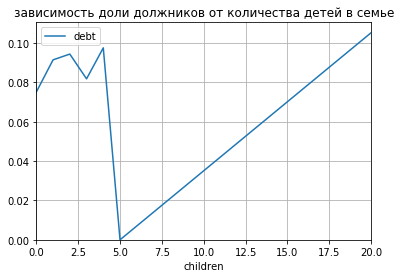

In [72]:
df.groupby('children')['debt'].mean().plot(title = 'зависимость доли должников от количества детей в семье' , ylim=0,grid=True,legend=True)

Резкий спад в графике вызван тем, что категория клиентов,имеющих 5 детей имеет очень малый удельный вес во всей базе.

### Вывод

Клиенты, имеющие 1,2 и в редких случаях 4 ребенка в семье имеют долю просрочек в погашении кредитов выше среднего.
Самый низкий процент должников в самой многочисленной категории клиентов, не имеющих детей.

#### Зависимость между семейным положением и возвратом кредита в срок

Построим сводную таблицу, сгруппировав клиентов по семейному положению и посчитаем долю должников в каждой категории:

In [74]:
df.groupby('family_status')['debt'].agg(['mean','count'])

,mean,count
family_status,,
Не женат / не замужем,0.097405,2813
в разводе,0.071130,1195
вдовец / вдова,0.065625,960
гражданский брак,0.092890,4177
женат / замужем,0.075202,12380


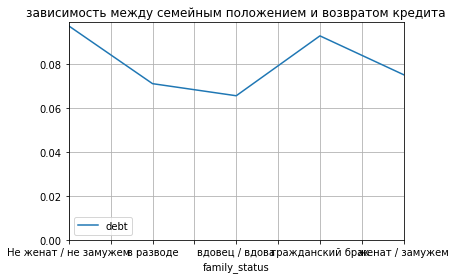

In [76]:
df.groupby('family_status')['debt'].mean().plot(title='зависимость между семейным положением и возвратом кредита',ylim=0,grid=True,legend=True)

### Вывод

Клиенты, состоящие в гражданском браке и в статусе "не женат/не замужем" имеют долю задолженностей в погашении кредитов выше среднего значения.

Меньше всего должников среди категории "вдовец"/"вдова"

#### Зависимость между уровнем дохода и возвратом кредита в срок

Для ответа на этот вопрос составим сводную таблицу по категориям дохода заемщиков и посчитаем среднюю долю должников внутри каждой категории:
 

In [80]:
df.groupby('income_category')['debt'].agg(['mean','count'])

,mean,count
income_category,,
высший класс,0.070575,1757
малообеспеченные,0.079494,5296
средний класс,0.082642,14472


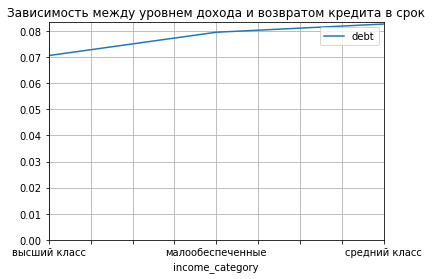

In [85]:
df.groupby('income_category')['debt'].mean().plot(title='Зависимость между уровнем дохода и возвратом кредита в срок',ylim=0,grid=True,legend=True)

### Вывод

Клиенты с доходом выше среднего имеют меньший процент просроченных платежей, в то время как средний класс и малообеспеченные заемщики допускают больше просрочек.

#### Влияние целей кредита на его возврат в срок

In [86]:
df.groupby('purpose_category')['debt'].agg(['mean','count'])

,mean,count
purpose_category,,
автомобиль,0.093395,4315
недвижимость,0.072140,10840
образование,0.091994,4022
свадьба,0.079216,2348


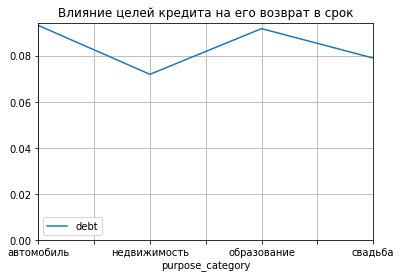

In [88]:
df.groupby('purpose_category')['debt'].mean().plot(title='Влияние целей кредита на его возврат в срок',ylim=0,grid=True,legend=True)

### Вывод

Почти половина кредитов берется с целью решения жилищных вопросов и в этой категории самый низкий процент должников.
Пятая часть кредитов берется клиентами для покупки/ремонта автомобиля, а так же для получения образования и доля задержек по выплате кредита в этих категориях выше среднего. 

###  4. ОБЩИЙ ВЫВОД

В данном проекте мы изучили таблицу, предоставленную заказчиком с информацией о клиентах банка и их кредитной историей.
Нами была проведена предобработка данных:
- выявлены и устранены пропуски значений
- выявлены и устранены дублирующиеся значения во всех столбцах
- данные были категоризированы, что позволило наглядно показать связь между различными параметрами

По проведенной работе можем внести предложение о доработке опросников клиентов путем указания четких целей кредитования, а так же уровня образования. Так же, возможно, стоит провести работу с сотрудниками, заниямиющимися внесением информации из опросников в базу данных банка и усилить на этом этапе контроль качества заполнения базы.


Мы так же изучили влияние различных факторов на платежеспособность заемщиков.
Пришли к выводу, что наиболее рискованными для банка являются займы от малообеспеченной категории клиентов, от клиентов не состаящих в официальном браке или отношениях, а так же займы на оплату образования и покупку автомобиля.

Наиболее безопасным решением для банка станет выдача кредитов категории клиентов с доходом выше среднего и кредитов на покупку жилья.

Эти данные позволят банку в дальнейшем автоматизировать процесс принятия решения по выдаче кредита путем построения модели кредитного скоринга.

